In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

# Dušeno nihanje s hiperboličnim trenjem

Sila trenja na klado je odvisna od hitrosti kot

$$
F_{tr} = -k_{tr} N tanh{\left( \frac{v}{v_c} \right)},
$$

kjer je $k_tr$ koeficient trenja, $N$ sila podlage, $v$ hitrost in $v_c$ toleranca hitrosti. Po Newtonovem zakonu zapišemo enačbo v obliki

$$
\ddot{x} + b \tanh{\left( \frac{\dot{x}}{v_c} \right)} + c x = 0,
$$

pri čemer je $b = k_{tr}g$, in $c = \frac{k}{m}$. Ta navadna diferencialna enačba drugega reda je enakovredna sistemu

$$
\dot{y} = F(t, y) =
\begin{bmatrix}
    v\\
    -b \tanh{\left( \frac{
    v}{v_c} \right)} - cx
\end{bmatrix},
\quad
y =
\begin{bmatrix}
    x\\
    v
\end{bmatrix}.
$$

Sistem rešimo numerično z Runge-Kutta metodo – konkretno z funkcijo `solve_ivp` iz paketa `Scipy`.

In [2]:
def dot_y(t, y, b, c, v_c):
    x, v = y
    return [v, -b*np.tanh(v/v_c) - c*x]

Na začetku klado izmaknemo za 5 cm in jo izpustimo. Začetni pogoji so torej

In [3]:
y_0 = (5e-2, 0)

Parametri pa

In [4]:
k_tr = 0.01
g = 9.81
k = 0.2
m = 0.1
v_c = 0.2

b = k_tr*g
c = k/m

In končno sistem rešimo

In [5]:
from scipy.integrate import solve_ivp

sol = solve_ivp(dot_y, (0, 20), y_0, args=(b, c, v_c), max_step=0.01)
t, (x, v) = sol.t, sol.y

fig, axs = plt.subplots(1, 2, figsize=[10, 4])

axs[0].plot(t, x)
axs[1].plot(x, v, color='tab:green')

axs[0].set_xlabel(r'$t\,[\mathrm{s}]$')
axs[0].set_ylabel(r'$x\,[\mathrm{m/s}]$')
axs[1].set_xlabel(r'$x\,[\mathrm{m}]$')
axs[1].set_ylabel(r'$v\,[\mathrm{m/s}]$')
fig.tight_layout()

Moč, s katero trenje zapravlja energijo, je

$$P_{tr} = b \tanh{\left( \frac{
v}{v_c} 
\right)} mv.$$

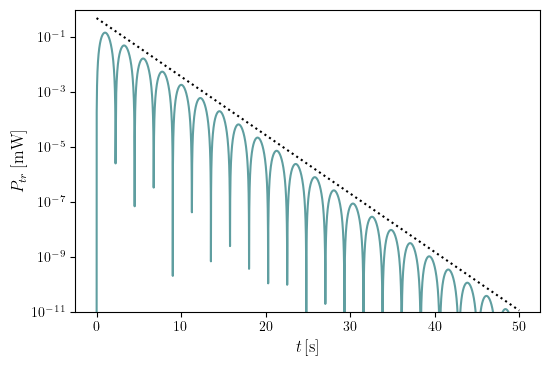

In [20]:
sol = solve_ivp(dot_y, (0, 50), y_0, args=(b, c, v_c), max_step=0.01)
t, (x, v) = sol.t, sol.y
P_tr = b * np.tanh(v/v_c) * m*v

fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.plot(t, 1e3 * P_tr, color='cadetblue')
ax.plot(t, 0.5 * np.exp(-b*t / v_c), color='black', linestyle=':')

ax.set_yscale('log')
ax.set_ylim(1e-11, 1)
ax.set_xlabel(r'$t\,[\mathrm{s}]$')
ax.set_ylabel(r'$P_{tr}\,[\mathrm{mW}]$')
None

Vidimo, da imamo na grafu špice. V bližini je klada za trenutek pri miru, torej bi tam pričakovali, da je moč trenja 0. A teh točk ne zadanemo popolnoma točno – zato se špice končajo ne neki bolj ali manj naključni višini. To je bližji pogled ene take špice.

In [12]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.plot(t, 1e3 * P_tr, color='tab:red')

ax.set_yscale('log')
ax.set_ylim(1e-11, 1)
ax.set_xlim(4, 5)
ax.set_xlabel(r'$t\,[\mathrm{s}]$')
ax.set_ylabel(r'$P_{tr}\,[\mathrm{mW}]$')
None

Zdaj najdemo najnižjo točko v špici in jih popravimo na vrednost 0.

In [17]:
from scipy.signal import find_peaks

mins, _ = find_peaks(-P_tr)
P_tr[mins] = 0

To je ista špica s popravljenimi vrednostmi.

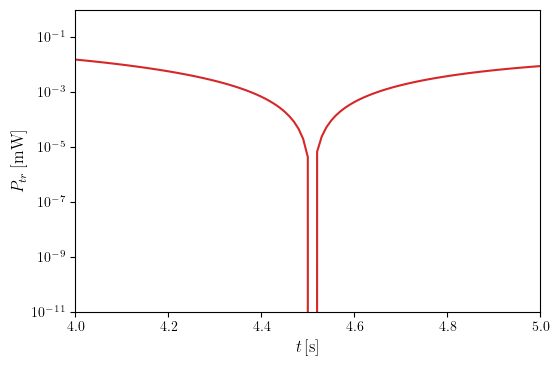

In [18]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.plot(t, 1e3 * P_tr, color='tab:red')

ax.set_yscale('log')
ax.set_ylim(1e-11, 1)
ax.set_xlim(4, 5)
ax.set_xlabel(r'$t\,[\mathrm{s}]$')
ax.set_ylabel(r'$P_{tr}\,[\mathrm{mW}]$')
None

Graf moči trenja je zdaj nekoliko bližje resničnemu dogajanju.

In [19]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.plot(t, 1e3 * P_tr, color='cadetblue')
ax.plot(t, 0.5 * np.exp(-b*t / v_c), color='black', linestyle=':')

ax.set_yscale('log')
ax.set_ylim(1e-11, 1)
ax.set_xlabel(r'$t\,[\mathrm{s}]$')
ax.set_ylabel(r'$P_{tr}\,[\mathrm{mW}]$')
None